Distribution of months with data per store:
 count    268.000000
mean       5.902985
std        0.634459
min        1.000000
25%        6.000000
50%        6.000000
75%        6.000000
max        6.000000
Name: YEAR_MONTH, dtype: float64
    YEAR_MONTH  STORE_NBR  total_sales  total_customers  total_transactions  \
266    2018-08          1       176.10               42                  43   
267    2018-08          2       193.80               39                  43   
268    2018-08          3      1079.75              112                 134   
269    2018-08          4      1259.50              123                 151   
270    2018-08          5       745.10               97                 112   

     avg_transactions_per_customer  
266                       1.023810  
267                       1.102564  
268                       1.196429  
269                       1.227642  
270                       1.154639  
{77: 111, 86: 101, 88: 237}


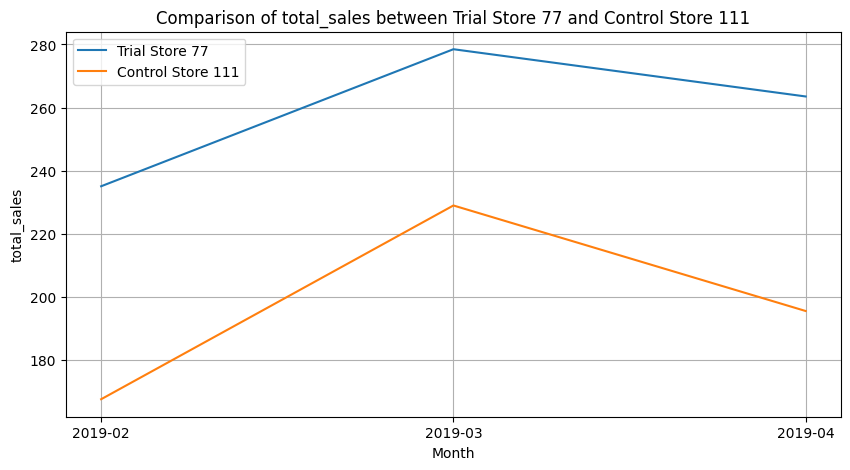

Trial Store 77 - total_sales:
count      3.00000
mean     259.00000
std       22.09638
min      235.00000
25%      249.25000
50%      263.50000
75%      271.00000
max      278.50000
Name: total_sales, dtype: float64

Control Store 111 - total_sales:
count      3.000000
mean     197.233333
std       30.790962
min      167.400000
25%      181.400000
50%      195.400000
75%      212.150000
max      228.900000
Name: total_sales, dtype: float64



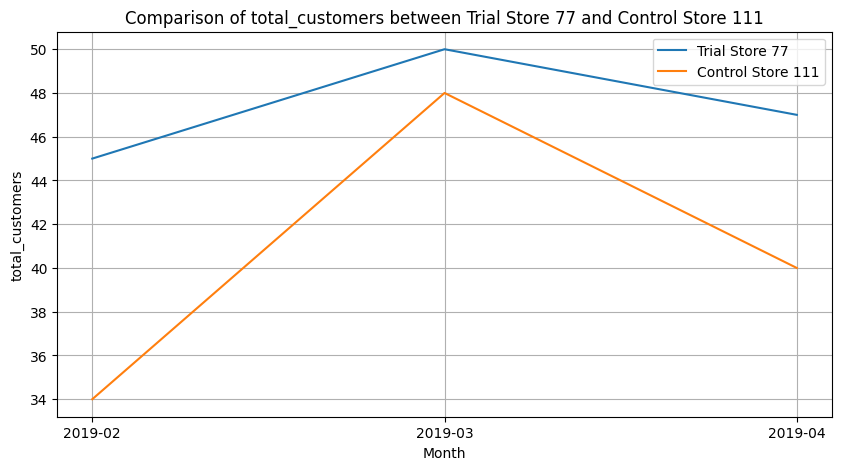

Trial Store 77 - total_customers:
count     3.000000
mean     47.333333
std       2.516611
min      45.000000
25%      46.000000
50%      47.000000
75%      48.500000
max      50.000000
Name: total_customers, dtype: float64

Control Store 111 - total_customers:
count     3.000000
mean     40.666667
std       7.023769
min      34.000000
25%      37.000000
50%      40.000000
75%      44.000000
max      48.000000
Name: total_customers, dtype: float64



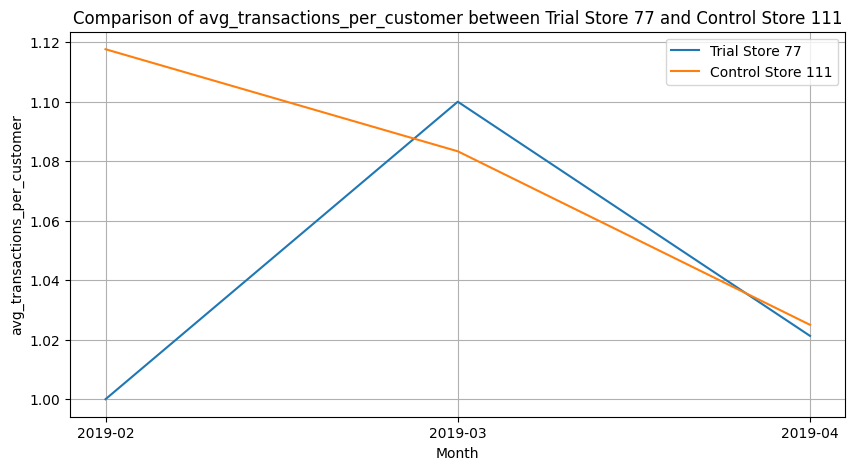

Trial Store 77 - avg_transactions_per_customer:
count    3.000000
mean     1.040426
std      0.052678
min      1.000000
25%      1.010638
50%      1.021277
75%      1.060638
max      1.100000
Name: avg_transactions_per_customer, dtype: float64

Control Store 111 - avg_transactions_per_customer:
count    3.000000
mean     1.075327
std      0.046840
min      1.025000
25%      1.054167
50%      1.083333
75%      1.100490
max      1.117647
Name: avg_transactions_per_customer, dtype: float64



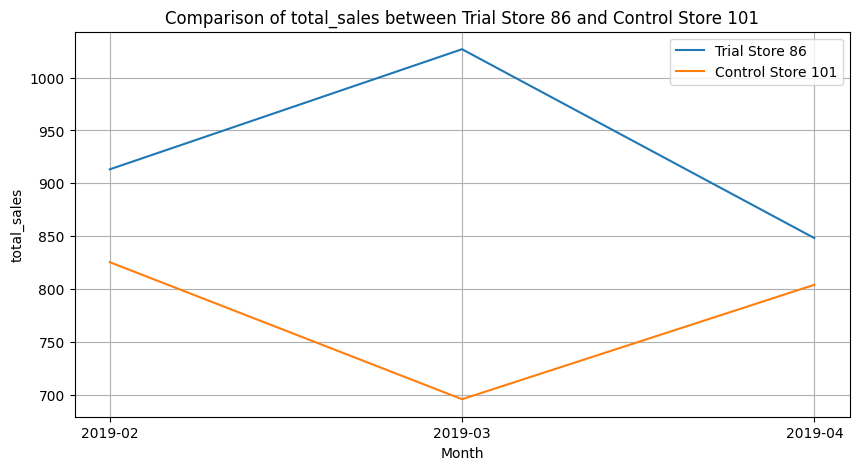

Trial Store 86 - total_sales:
count       3.000000
mean      929.400000
std        90.395354
min       848.200000
25%       880.700000
50%       913.200000
75%       970.000000
max      1026.800000
Name: total_sales, dtype: float64

Control Store 101 - total_sales:
count      3.000000
mean     775.066667
std       69.475847
min      695.800000
25%      749.900000
50%      804.000000
75%      814.700000
max      825.400000
Name: total_sales, dtype: float64



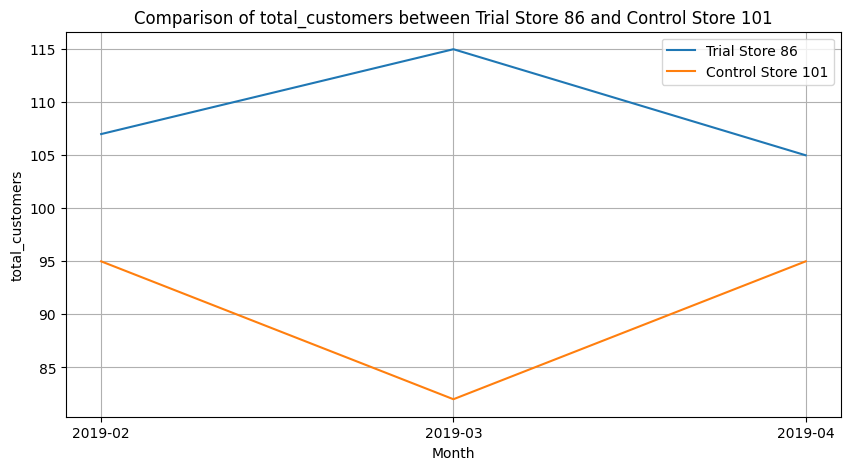

Trial Store 86 - total_customers:
count      3.000000
mean     109.000000
std        5.291503
min      105.000000
25%      106.000000
50%      107.000000
75%      111.000000
max      115.000000
Name: total_customers, dtype: float64

Control Store 101 - total_customers:
count     3.000000
mean     90.666667
std       7.505553
min      82.000000
25%      88.500000
50%      95.000000
75%      95.000000
max      95.000000
Name: total_customers, dtype: float64



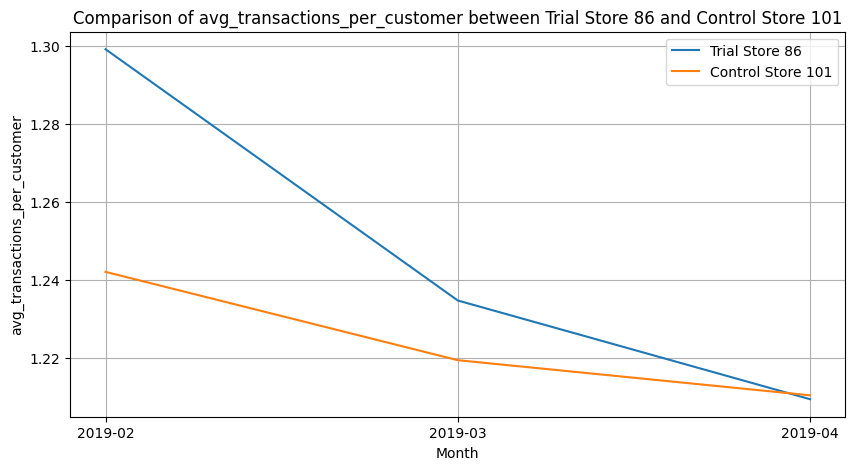

Trial Store 86 - avg_transactions_per_customer:
count    3.000000
mean     1.247791
std      0.046166
min      1.209524
25%      1.222153
50%      1.234783
75%      1.266924
max      1.299065
Name: avg_transactions_per_customer, dtype: float64

Control Store 101 - avg_transactions_per_customer:
count    3.000000
mean     1.224048
std      0.016271
min      1.210526
25%      1.215019
50%      1.219512
75%      1.230809
max      1.242105
Name: avg_transactions_per_customer, dtype: float64



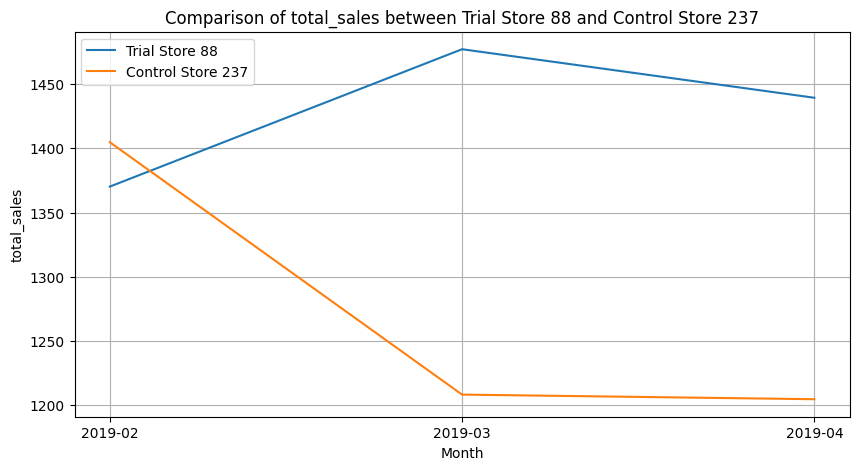

Trial Store 88 - total_sales:
count       3.000000
mean     1428.933333
std        54.262449
min      1370.200000
25%      1404.800000
50%      1439.400000
75%      1458.300000
max      1477.200000
Name: total_sales, dtype: float64

Control Store 237 - total_sales:
count       3.000000
mean     1272.533333
std       114.560435
min      1204.600000
25%      1206.400000
50%      1208.200000
75%      1306.500000
max      1404.800000
Name: total_sales, dtype: float64



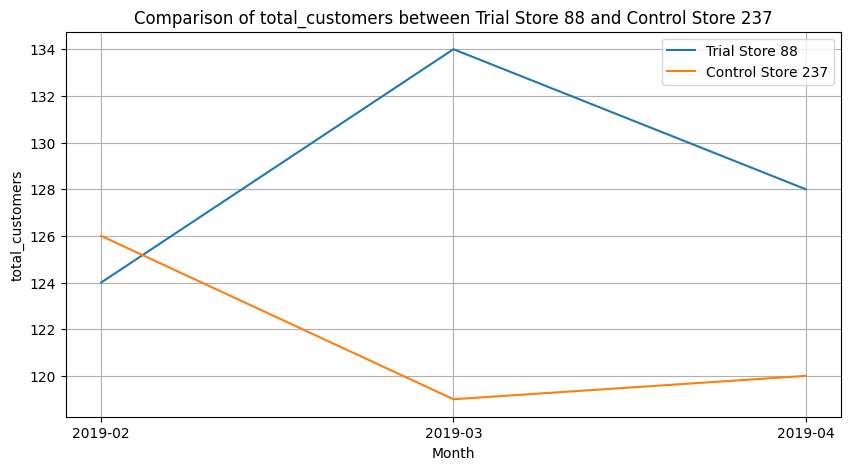

Trial Store 88 - total_customers:
count      3.000000
mean     128.666667
std        5.033223
min      124.000000
25%      126.000000
50%      128.000000
75%      131.000000
max      134.000000
Name: total_customers, dtype: float64

Control Store 237 - total_customers:
count      3.000000
mean     121.666667
std        3.785939
min      119.000000
25%      119.500000
50%      120.000000
75%      123.000000
max      126.000000
Name: total_customers, dtype: float64



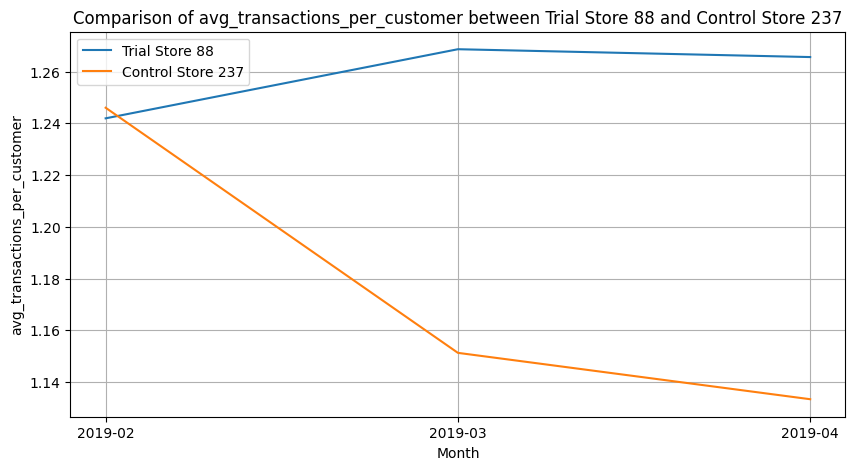

Trial Store 88 - avg_transactions_per_customer:
count    3.000000
mean     1.258739
std      0.014631
min      1.241935
25%      1.253780
50%      1.265625
75%      1.267141
max      1.268657
Name: avg_transactions_per_customer, dtype: float64

Control Store 237 - avg_transactions_per_customer:
count    3.000000
mean     1.176875
std      0.060558
min      1.133333
25%      1.142297
50%      1.151261
75%      1.198646
max      1.246032
Name: avg_transactions_per_customer, dtype: float64



In [2]:
import pandas as pd
from scipy.spatial.distance import euclidean
from scipy.stats import zscore
import matplotlib.pyplot as plt


# Load the dataset
file_path = 'QVI_data.csv'  
data = pd.read_csv(file_path)

# Convert DATE column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Extract year and month from DATE for aggregation
data['YEAR_MONTH'] = data['DATE'].dt.to_period('M')

# Aggregate data at a monthly level
monthly_data = data.groupby(['YEAR_MONTH', 'STORE_NBR']).agg({
    'TOT_SALES': 'sum',
    'LYLTY_CARD_NBR': 'nunique',
    'TXN_ID': 'count'
}).reset_index()

# Rename columns for clarity
monthly_data.rename(columns={
    'TOT_SALES': 'total_sales',
    'LYLTY_CARD_NBR': 'total_customers',
    'TXN_ID': 'total_transactions'
}, inplace=True)

# Calculate average number of transactions per customer
monthly_data['avg_transactions_per_customer'] = monthly_data['total_transactions'] / monthly_data['total_customers']

# Define the pre-trial period (use a smaller subset of the data)
pre_trial_period_start = '2018-08'
pre_trial_period_end = '2019-01'

# Filter to the pre-trial period
pre_trial_period = monthly_data[(monthly_data['YEAR_MONTH'] >= pre_trial_period_start) & 
                                (monthly_data['YEAR_MONTH'] <= pre_trial_period_end)]

# Check the number of months each store has data for in the pre-trial period
store_month_counts = pre_trial_period.groupby('STORE_NBR')['YEAR_MONTH'].nunique()
print("Distribution of months with data per store:\n", store_month_counts.describe())

# Define the minimum number of months a store should have data for to be considered
min_months_threshold = 5  
full_obs_stores = store_month_counts[store_month_counts >= min_months_threshold].index.tolist()

# Filter pre-trial period data to include only stores with data for at least min_months_threshold months
pre_trial_period = pre_trial_period[pre_trial_period['STORE_NBR'].isin(full_obs_stores)]

# Display the first few rows of the pre-trial period data
print(pre_trial_period.head())

# Calculate similarity using Euclidean distance
def calculate_similarity(trial_store, metric):
    distances = {}
    trial_data = pre_trial_period[pre_trial_period['STORE_NBR'] == trial_store].set_index('YEAR_MONTH')[metric]
    
    for store in pre_trial_period['STORE_NBR'].unique():
        if store != trial_store:
            store_data = pre_trial_period[pre_trial_period['STORE_NBR'] == store].set_index('YEAR_MONTH')[metric]
            
            # Ensure there is sufficient data and align months
            common_months = trial_data.index.intersection(store_data.index)
            if len(common_months) > 1:
                aligned_trial_data = trial_data.loc[common_months]
                aligned_store_data = store_data.loc[common_months]
                distance = euclidean(aligned_trial_data, aligned_store_data)
                distances[store] = distance
    
    return distances

# Define a function to find the best control store based on multiple metrics
def find_best_control_store(trial_store):
    metrics = ['total_sales', 'total_customers', 'avg_transactions_per_customer']
    store_scores = {store: 0 for store in pre_trial_period['STORE_NBR'].unique() if store != trial_store}
    
    for metric in metrics:
        distances = calculate_similarity(trial_store, metric)
        sorted_stores = sorted(distances, key=distances.get)
        
        for rank, store in enumerate(sorted_stores):
            store_scores[store] += rank
    
    best_control_store = int(min(store_scores, key=store_scores.get, default=None))
    return best_control_store

# Find best control stores for each trial store
trial_stores = [77, 86, 88]
control_stores = {trial_store: find_best_control_store(trial_store) for trial_store in trial_stores}

# Display the selected control stores
print(control_stores)

# Define the trial period
trial_period_start = '2019-02'
trial_period_end = '2019-04'

# Filter data for the trial period
trial_period = monthly_data[(monthly_data['YEAR_MONTH'] >= trial_period_start) & 
                            (monthly_data['YEAR_MONTH'] <= trial_period_end)]

def compare_stores(trial_store, control_store, metric):
    trial_data = trial_period[trial_period['STORE_NBR'] == trial_store].set_index('YEAR_MONTH')[metric]
    control_data = trial_period[trial_period['STORE_NBR'] == control_store].set_index('YEAR_MONTH')[metric]
    
    # Convert Period index to string for plotting
    trial_data.index = trial_data.index.astype(str)
    control_data.index = control_data.index.astype(str)
    
    # Plot the data for comparison
    plt.figure(figsize=(10, 5))
    plt.plot(trial_data.index, trial_data.values, label=f'Trial Store {trial_store}')
    plt.plot(control_data.index, control_data.values, label=f'Control Store {control_store}')
    plt.title(f'Comparison of {metric} between Trial Store {trial_store} and Control Store {control_store}')
    plt.xlabel('Month')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print summary statistics for the trial period
    print(f"Trial Store {trial_store} - {metric}:\n{trial_data.describe()}\n")
    print(f"Control Store {control_store} - {metric}:\n{control_data.describe()}\n")

# Compare total sales, total customers, and average transactions per customer for each trial-control store pair
for trial_store, control_store in control_stores.items():
    compare_stores(trial_store, control_store, 'total_sales')
    compare_stores(trial_store, control_store, 'total_customers')
    compare_stores(trial_store, control_store, 'avg_transactions_per_customer')